In [1]:
#датафрейм по ковид-19 со странами/провинциями, смерности, выздоровлениях, заражениях по датам до 29.07.2020 включительно
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
from datetime import datetime, time

path = 'C:\\Users\\staff\\Desktop\\Математика,машинное_обучение\\Практика\\data_covid19\\covid_19_data.csv'
df = pd.read_csv(path)
df.rename(columns={ df.columns[0]: "index" }, inplace=True) 
df.set_index(['index'], inplace=True)
df.rename(columns={ df.columns[0]: "Date" }, inplace=True) 
del df['Province/State']
del df['Last Update']

df['Confirmed'] = df.Confirmed.astype('int64')
df['Deaths'] = df.Deaths.astype('int64')
df['Recovered'] = df.Recovered.astype('int64')
df['Date']= pd.to_datetime(df['Date'])
df

# df_Russia_clear[df_Russia_clear['Confirmed']<3] #обращение с индексом
# df_Russia_clear.query('Confirmed == 2')# поиск 
# df['Data'] = df.Data.astype('datetime64[ns]')
# df['Data'] = df['Data'].dt.strftime('%b %Y') #преобразование даны
# df['Data'] = df.Data.astype('datetime64[ns]')


,Date,Country/Region,Confirmed,Deaths,Recovered
index,,,,,
1,2020-01-22,Mainland China,1,0,0
2,2020-01-22,Mainland China,14,0,0
3,2020-01-22,Mainland China,6,0,0
4,2020-01-22,Mainland China,1,0,0
5,2020-01-22,Mainland China,0,0,0
...,...,...,...,...,...
75234,2020-07-29,Ukraine,767,21,582
75235,2020-07-29,Netherlands,851,69,0
75236,2020-07-29,Mainland China,1270,1,1268


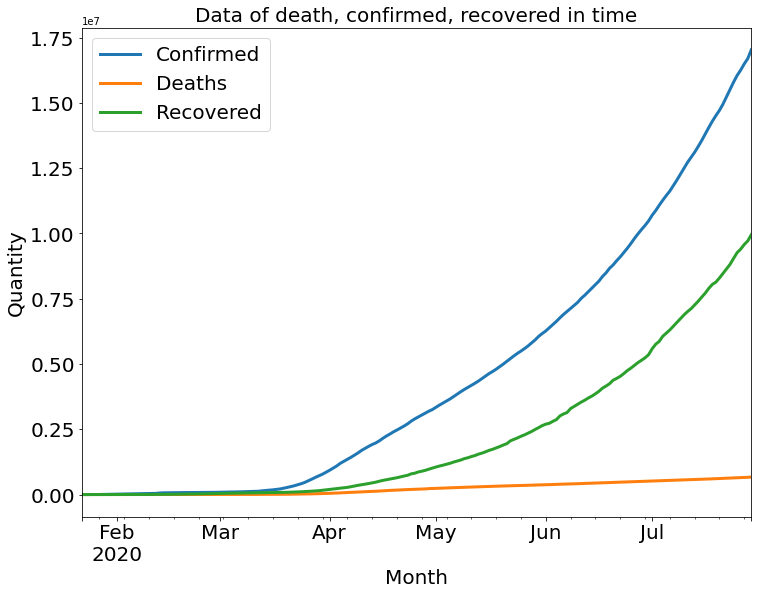

In [2]:
time_df = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum() 
#сгрупированы по дате кол-во подтвержденных заражений, выздоровевших, умерших
data_virus = time_df.plot(linewidth=3)
data_virus.set_title('Data of death, confirmed, recovered in time', fontsize=20)
data_virus.set_xlabel('Month', fontsize=20)
data_virus.set_ylabel('Quantity', fontsize=20)
data_virus.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize= 20)
#График отражает суммарную ситуацию с вирусом(данные постоянно суммириуються с предыдущими). 

In [3]:
#Данные по России
df_Russia = df[(df['Country/Region'] == 'Russia')]
df_Russia_clear = df_Russia.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum() 
df_Russia_clear



,Confirmed,Deaths,Recovered
Date,,,
2020-01-31,2,0,0
2020-02-01,2,0,0
2020-02-02,2,0,0
2020-02-03,2,0,0
2020-02-04,2,0,0
...,...,...,...
2020-07-25,805332,13172,596064
2020-07-26,811073,13249,599172
2020-07-27,816680,13334,602249


Text(0, 0.5, 'Confirmed')

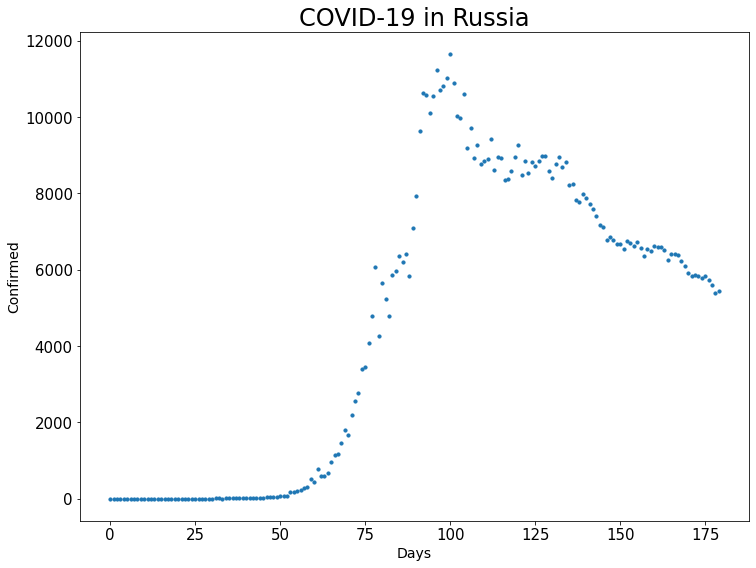

In [4]:
#Диаграмма выявленных случаев COVID-19 в России. Ось X-количество дней с момента 1ых выявленных случаев. Ось Y-количество
df_Russia = df_Russia_clear[1:]

days = 0
confirmed_list = []
date_list = []
for index, row in df_Russia.iterrows():
    #Сравнение данных с предыдущим днем
    previous_row = [df_Russia_clear.iloc[days][0]]
    date_list.append(days)
    days += 1
    
    if row['Confirmed'] <= previous_row[0]:
        confirmed_list.append(row['Confirmed'])
        
    elif row['Confirmed'] - previous_row[0] >0: #если больше, то вычитаеться их текущего прошедий 
        #день для выявления конкретного количества зараженных в этот день
        confirmed = row['Confirmed'] - previous_row[0]
        confirmed_list.append(confirmed)
    

data = pd.DataFrame({'confirmed':confirmed_list, 'day':date_list})
data.set_index(['day'], inplace=True)

plt.scatter(date_list, confirmed_list,  s=10)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('COVID-19 in Russia', fontsize=24)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Confirmed', fontsize=14)
#На графике видно, что в данный момент происходит медленное снижение выявленных случаев

In [5]:
def pandemic_in_Russia(name_aspect):
    if 'Deaths' == name_aspect:
        aspect = 1
    elif 'Confirmed'== name_aspect:
        aspect = 0
    elif 'Recovered'== name_aspect:
        aspect = 2
    
    df_Russia = df_Russia_clear[1:]
    days = 0
    data_aspect_list = []
    date_list = []
    
    for index, row in df_Russia.iterrows():
        previous_row = [df_Russia_clear.iloc[days][aspect]][0]
        date_list.append(days)
        days += 1
        
        if row[name_aspect] <= previous_row:
            data_aspect_list.append(row[name_aspect])

        elif row[name_aspect] > previous_row:
            aspect_df = row[name_aspect] - previous_row
            data_aspect_list.append(aspect_df)
  
    
    data = pd.DataFrame({name_aspect:data_aspect_list, 'day':date_list})
    data.set_index(['day'], inplace=True)
    return data


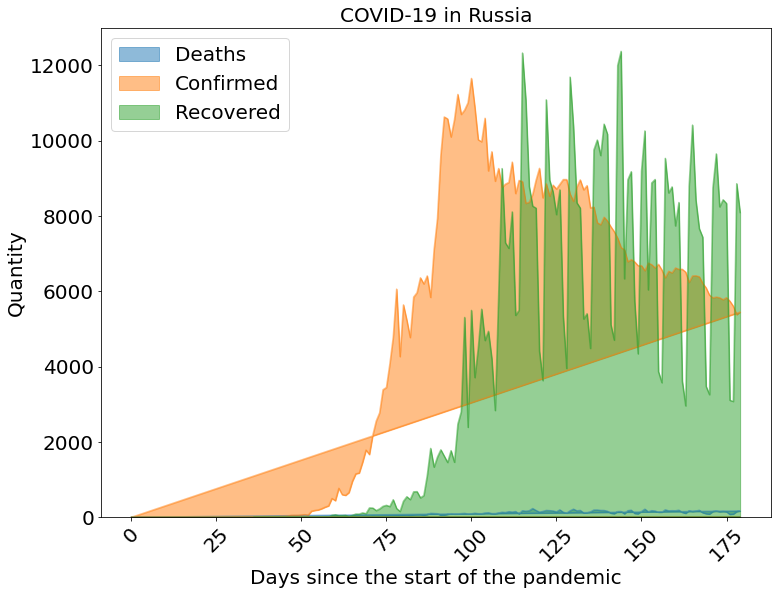

In [6]:
#Отображение всех трех аспектов(смертность, выздоровление, выявленные случаи)
dinamic_morbidity = pd.concat([pandemic_in_Russia('Deaths'), pandemic_in_Russia('Confirmed'), pandemic_in_Russia('Recovered')])
info = dinamic_morbidity.plot(kind='area', rot=45, stacked=False)
info.set_title('COVID-19 in Russia', fontsize=20)
info.set_xlabel('Days since the start of the pandemic', fontsize=20)
info.set_ylabel('Quantity', fontsize=20)
info.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize= 20)
#На графике видно, что  летальность относительно невысокая. 
#На графике большие перепады выздоровевших.  Можно предположить, что влияет какая то третья переменная. 
#Возмжоно самые низкие значения -это дни праздников и выходных. 
#Т.к. выписка(что равняеться выздоровлению) в эти дни как правило не производиться